   CustomerID  PurchaseAmount  Frequency  Recency
0           1       43.708611          7       28
1           2       95.564288          1       17
2           3       75.879455          4        2
3           4       63.879264          4        1
4           5       24.041678          5       16


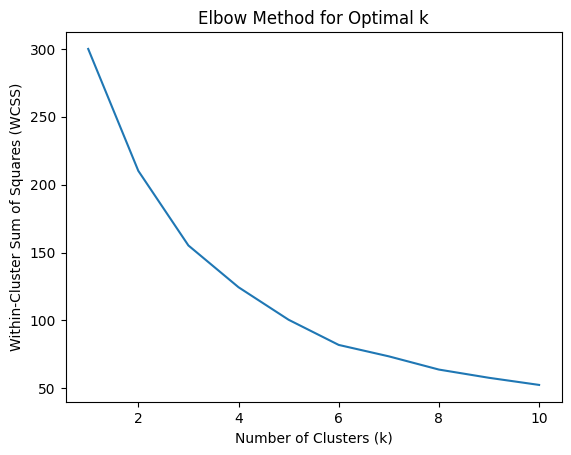

         CustomerID  PurchaseAmount  Frequency    Recency
Cluster                                                  
0         43.806452       30.096171   5.000000   7.096774
1         56.400000       47.634131   6.800000  22.857143
2         50.529412       77.395612   2.852941  12.117647


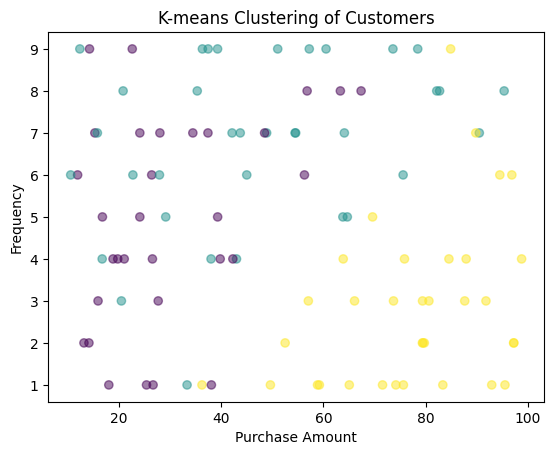

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Generate a hypothetical customer dataset
np.random.seed(42)
data = pd.DataFrame({
    'CustomerID': range(1, 101),
    'PurchaseAmount': np.random.uniform(10, 100, 100),
    'Frequency': np.random.randint(1, 10, 100),
    'Recency': np.random.randint(1, 30, 100)
})

# Display the first few rows of the dataset
print(data.head())

# Select relevant features
purchase_history_columns = ['PurchaseAmount', 'Frequency', 'Recency']
X = data[purchase_history_columns]

# Standardize the features (important for K-means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Based on the Elbow method, choose the optimal number of clusters
optimal_k = 3  # You can adjust this based on the Elbow method plot

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the clusters and their characteristics
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)

# Visualize the clusters (for 3 features)
plt.scatter(data['PurchaseAmount'], data['Frequency'], c=data['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('K-means Clustering of Customers')
plt.show()
